<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/Deep_learning_with_python_Fran%C3%A7ois_Chollet_ch8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OCR** stands for "Optical Character Recognition." It is a technology that recognizes text within a digital image. It is commonly used to recognize text in scanned documents and images. OCR software can be used to convert a physical paper document, or an image into an accessible electronic version with text.

8.1 introduction to convnets(convolutional neural networks)

simple convnet example that classifies MNIST digits
- build the model using the Functional API
- stack of Conv2D and MaxPooling2D layers

In [4]:
!pip install tensorflow

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

This code snippet is a simple example of building a convolutional neural network (CNN) using TensorFlow's Keras API for image classification tasks. Here's a breakdown of what each line does:

1. `from tensorflow import keras`: Imports the Keras module from TensorFlow.
2. `from tensorflow.keras import layers`: Imports the layers module from Keras.
3. `inputs = keras.Input(shape=(28, 28, 1))`: Defines the input layer with a shape of (28, 28, 1), which is commonly used for processing grayscale images of size 28x28 pixels.
Importantly, a convnet takes as input tensors of shape (image_height, image_width, image_channels), not including the batch dimension. In this case, we’ll configure the convnet to process inputs of size (28, 28, 1), which is the format of MNIST images.
4. `x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)`: Adds a 2D convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation function after the input layer.
5. `x = layers.MaxPooling2D(pool_size=2)(x)`: Adds a max-pooling layer with a pool size of 2x2 after the convolutional layer to downsample the feature maps.
6. `x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)`: Adds another 2D convolutional layer with 64 filters and a kernel size of 3x3 after the max-pooling layer.
7. `x = layers.MaxPooling2D(pool_size=2)(x)`: Adds another max-pooling layer after the second convolutional layer.
8. `x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)`: Adds a third 2D convolutional layer with 128 filters and a kernel size of 3x3.
9. `x = layers.Flatten()(x)`: Flattens the output from the convolutional layers into a 1D array to feed into a dense layer.
10. `outputs = layers.Dense(10, activation="softmax")(x)`: Adds a dense layer with 10 units (for 10 classes in this case) and a softmax activation function to generate class probabilities.
11. `model = keras.Model(inputs=inputs, outputs=outputs)`: Creates a Keras Model by specifying the input and output layers of the model.

This code defines a CNN model architecture for image classification tasks, specifically designed for processing grayscale images of size 28x28 pixels.


In [6]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         7385


You can see that the output of every Conv2D and MaxPooling2D layer is a rank-3 tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the model. The number of channels is controlled by the first argument passed to the Conv2D layers (32, 64, or 128).
After the last Conv2D layer, we end up with an output of shape (3, 3, 128) —a 3 × 3 feature map of 128 channels.
<br><br>
The next step is to feed this output into a densely connected classifier like those you're already familiar with: a stack of Dense layers. These classifiers process vectors, which are 1D, whereas the current output is a rank-3 tensor. To bridge the gap, we flatten the 3D outputs to ID with a Flatten layer before adding the Dense layers.
Finally, we do 10-way classification, so our last layer has 10 outputs and a softmax activation.




In [7]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
938/938 [==============================] - 54s 57ms/step - loss: 0.1652 - accuracy: 0.9486
Epoch 2/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0449 - accuracy: 0.9862
Epoch 3/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0304 - accuracy: 0.9906
Epoch 4/5
938/938 [==============================] - 54s 57ms/step - loss: 0.0240 - accuracy: 0.9928
Epoch 5/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0178 - accuracy: 0.9949


This code snippet demonstrates the process of preparing the MNIST dataset for training a neural network model using TensorFlow's Keras API. Here is a breakdown of each line:

1. `from tensorflow.keras.datasets import mnist`: Imports the MNIST dataset from Keras, which is a popular dataset of handwritten digits for image classification tasks.
2. `(train_images, train_labels), (test_images, test_labels) = mnist.load_data()`: Loads the MNIST dataset, splitting it into training and testing sets with images and corresponding labels.
3. `train_images = train_images.reshape((60000, 28, 28, 1))`: Reshapes the training images array to have a shape of (60000, 28, 28, 1) to match the input shape expected by the neural network model.
4. `train_images = train_images.astype("float32") / 255`: Converts the training images to float32 data type and normalizes the pixel values to be between 0 and 1 by dividing by 255.
5. `test_images = test_images.reshape((10000, 28, 28, 1))`: Reshapes the testing images array to have a shape of (10000, 28, 28, 1) to match the input shape expected by the neural network model.
6. `test_images = test_images.astype("float32") / 255`: Converts the testing images to float32 data type and normalizes the pixel values to be between 0 and 1 by dividing by 255.
7. `model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])`: Compiles the model with the RMSprop optimizer, sparse categorical crossentropy loss function (suitable for integer-encoded labels), and accuracy as the metric to monitor during training.
8. `model.fit(train_images, train_labels, epochs=5, batch_size=64)`: Trains the model using the training images and labels for 5 epochs with a batch size of 64 samples per gradient update.

Overall, this code snippet sets up the MNIST dataset, preprocesses the data for training, compiles the model with appropriate settings, and trains the model on the training data for a specified number of epochs.


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 3s 9ms/step - loss: 0.0192 - accuracy: 0.9934
Test accuracy: 0.993


This code snippet evaluates the trained model on the test dataset to assess its performance. Here is an explanation of each line:

1. `test_loss, test_acc = model.evaluate(test_images, test_labels)`: This line evaluates the model on the test dataset by passing the test images and corresponding labels to the `evaluate` method of the model. It calculates the loss and accuracy of the model on the test dataset and assigns the values to the variables `test_loss` and `test_acc`, respectively.

2. `print(f"Test accuracy: {test_acc:.3f}")`: This line prints out the test accuracy of the model rounded to three decimal places. It uses f-string formatting to include the value of `test_acc` in the printed message.

Overall, these lines of code are used to evaluate the trained model's performance on unseen test data and provide insight into how well the model generalizes to new, unseen examples.


**The fundamental difference between a densely connected layer and a convolution layer is this:**<br>
Dense layers learn global patterns in their input feature space (for example, for an MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns—in the case of images, patterns found in small 2D windows of the inputs.

two convnets properties:
1. The patterns they learn are translation-invariant
2. They can learn spatial hierarchies of patterns

**Convolution operations** work on rank-3 tensors known as feature maps, comprising spatial axes (height and width) and a depth axis (channels). The depth axis varies based on the input, such as 3 for RGB images and 1 for grayscale like MNIST digits. **The operation** extracts patches from the input, applying the same **transformation** to each patch to generate an output feature map. This output map retains width and height dimensions but can have any depth, representing filters capturing distinct data features.

**MNIST:**<br>
First convolution layer takes a feature map of size (28, 28, 1)<br>
Outputs a feature map of size (26, 26, 32)<br>
it computes 32 filters over its input. Each of these 32 output channels contains a 26 × 26 grid of values, which is a response map of the filter over the input, indicating the response of that filter pattern at different locations in the input.

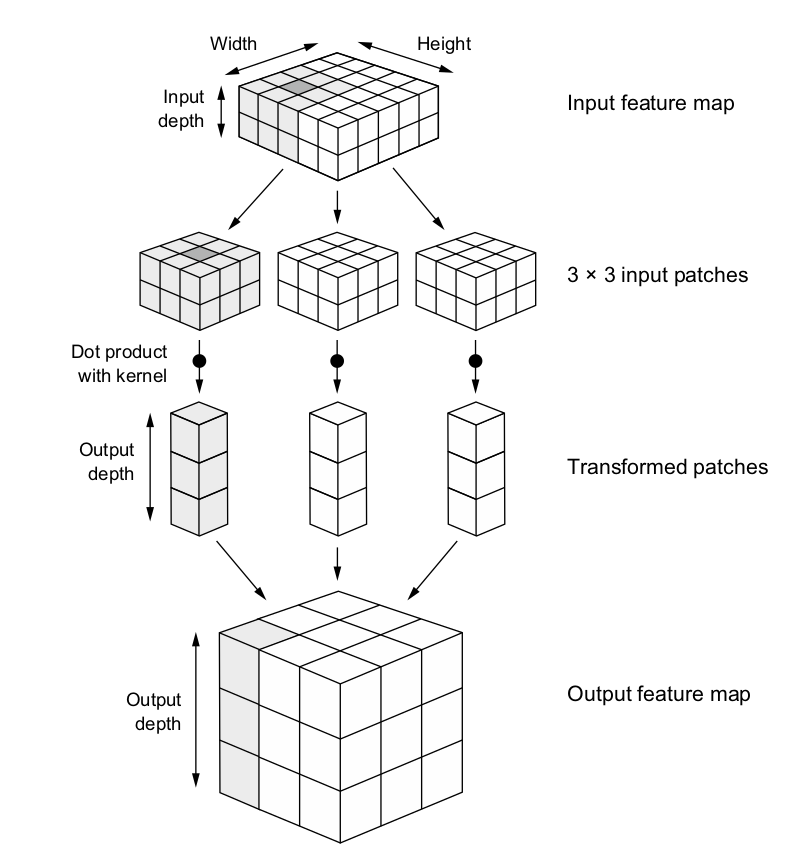

<br>
Note that the output width and height may differ from the input width and height for two reasons:<br>

- Border effects, which can be countered by padding the input feature map

- The use of strides

In Conv2D layers, padding is configurable via the padding argument, which takes two values:
1. "valid", which means no padding (only valid window locations will be used)
2. "same", which means “pad in such a way as to have an output with the same width and height as the input.”
<br>The padding argument defaults to "valid".

**role of max pooling: to aggressively downsample feature maps, much like strided convolutions.**

<br>

Max pooling consists of extracting windows from the input feature maps and outputting the max value of each channel. It’s conceptually similar to convolution, except that instead of **transforming local patches via a learned linear transformation** (the convolution kernel), they’re transformed via a **hardcoded max tensor operation**. A big difference from convolution is that max pooling is usually done with 2 × 2 windows and stride 2, in order to downsample the feature maps by a factor of 2. On the other hand, convolution is typically done with 3 × 3 windows and no stride (stride 1).

================================================
<br>
An incorrectly structured convnet missing its max-pooling layers

In [9]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model_no_max_pool.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 flatten_3 (Flatten)         (None, 61952)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712202 (2.72 MB)
Trainable params: 712202 (2.